In [1]:
import tweepy
import numpy as np

In [2]:
def find_t_index( numbers):
    '''
    Find the largest number T such that T of the given numbers are no less than T.
    '''
    # sort the list of numbers in non-ascending order
    numbers.sort( reverse=True)
    for T, t in enumerate(numbers):
        if t < T + 1:
            break
    else:
        return T + 1
    return T

def unit_test_t_index( finder, trials=10):
    import numpy as np
    success = True
    for trial in range( trials):
        numbers = np.random.randint( 0, 100, 50)
        T = finder( list(numbers))
        noless = (numbers >= T).sum()
        noless1 = (numbers >= T+1).sum()
        if noless < T or noless1 >= T + 1:
            print( 'FAIL: Incorrect T index: %d < %d or % >= %d' % (noless, T, noless1, T+1))
            print( '\t[%s]' % ','.join(['%d' % i for i in numbers]))
            success = False
    if success:
        print( 'SUCCESS: Unit test for t-index passed.')
    return success

print( find_t_index( [1,2,3,4,5]))
print( find_t_index( [5,5,5,5,5]))
print( find_t_index( [1,2,4,6,3,5]))
unit_test_t_index( find_t_index)

3
5
3
SUCCESS: Unit test for t-index passed.


True

In [3]:
import time

def get_all_followers( api, screen_name, rate_limit=15, limit_interval=15):
    followers = []
    data, cursor = api.get_followers( screen_name=screen_name, skip_status=True, cursor=-1)
    nrequests = 1
    while data:
        followers.extend( data)
        data, cursor = api.get_followers( screen_name=screen_name, skip_status=True, count=200, cursor=cursor[1])
        nrequests += 1
        if nrequests == rate_limit:
            print("%d followers retrieved, but rate limit reached.  Sleep for %d minutes before continuing." %
                 (len(followers), limit_interval))
            seconds_in_minute = 60
            t0 = time.time()
            time.sleep( (limit_interval + 0.)*seconds_in_minute)
            t1 = time.time()
            print("Resuming retrieval after %.2f minutes." % ((t1 - t0)/seconds_in_minute))
            nrequests = 0
    return followers

In [4]:
# credentials.py contains the following lines
# Replace these with your own Twitter API credentials
# consumer_key = "YOUR_CONSUMER_KEY"
# consumer_secret = "YOUR_CONSUMER_SECRET"
# access_token = "YOUR_ACCESS_TOKEN"
# access_token_secret = "YOUR_ACCESS_TOKEN_SECRET"

from credentials import *

# Authenticate with the Twitter API
auth = tweepy.OAuth1UserHandler(
    consumer_key, consumer_secret, access_token, access_token_secret
)
api = tweepy.API(auth)

# Replace "twitter_handle" with the handle of the account for which you want to calculate the t-index
twitter_handle = "hardsphere" # "CarolynBertozzi"

# Retrieve the list of followers for the given Twitter handle
followers = get_all_followers(api, screen_name=twitter_handle)

# Get the number of followers for each follower
nfollowers = [ user.followers_count for user in followers ]

screen_names = [ user.screen_name for user in followers ]

t_index = find_t_index( nfollowers[:])

# The t-index is equal to the number of followers who have at least T followers of their own
print(f"The t-index for {twitter_handle} is {t_index}")

The t-index for hardsphere is 213


In [5]:
followers_sorted = list( zip( screen_names, nfollowers))
followers_sorted.sort( key=lambda x: x[1])
# for name, num in followers_sorted:
#     print(f"{name}: {num}")

In [6]:
from matplotlib import pyplot as plt
import matplotlib
matplotlib.rcParams.update( {'font.size': 20})

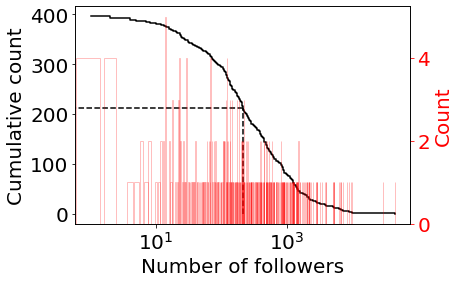

In [7]:
def mark_t_index( ax, t_index):
    ax.plot( [t_index, t_index], [0, t_index], 'k--')
    ax.plot( [0, t_index], [t_index, t_index], 'k--')
    # ax.plot( [1, t_index], [1, t_index], 'k-.')
    
def plot_num_followers_distribution( nfollowers, t_index):
    nfollowers.sort()
    ncounts = []
    nprev = nfollowers.pop()
    count = 1
    while nfollowers:
        n = nfollowers.pop()
        if n==nprev:
            count += 1
        else:
            ncounts.append( (nprev, count))
            nprev = n
            count = 1
    
    ncounts = np.array( ncounts)
    cumsum = np.cumsum( ncounts[:,1])
    
    fig, ax = plt.subplots()
    mark_t_index( ax, t_index)
    ax.step( ncounts[:,0], cumsum, color='k')
    ax.set_xscale( 'log')
    ax.set_ylabel( 'Cumulative count')
    ax.set_xlabel( 'Number of followers')
    ax2 = ax.twinx()
    ax2.bar( ncounts[:,0], ncounts[:,1], edgecolor='red', facecolor='none', alpha=0.25)
    ax2.set_ylabel( 'Count')
    ax2.yaxis.label.set_color( 'red')
    ax2.tick_params( axis='y', colors='red')
    return fig

nfollow_plot = plot_num_followers_distribution( nfollowers[:], t_index)

In [8]:
nfollow_plot.savefig( 'hardsphere-cumsum.png', resolution=300, bbox_inches='tight')

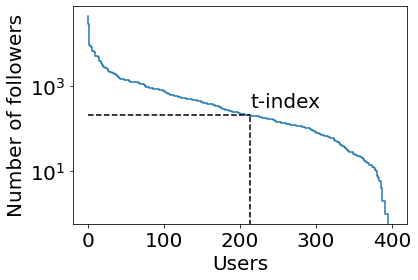

In [9]:
def plot_num_followers_t_index( nfollowers, t_index):
    nfollowers.sort( reverse=True)
    fig, ax = plt.subplots()
    ax.step( np.arange( len(nfollowers)), nfollowers)
    mark_t_index( ax, t_index)
    ax.set_yscale( 'log')
    ax.set_xlabel( 'Users')
    ax.set_ylabel( 'Number of followers')
    shift = 1.5
    ax.text( t_index + shift, t_index*shift, 't-index')

    return fig

t_index_plot = plot_num_followers_t_index( nfollowers[:], t_index)

In [10]:
t_index_plot.savefig( 'hardsphere-t-index.png', resolution=300, bbox_inches='tight')

The following is the incorrect program that ChatGPT produced in response to the following request:

Given N integers a1, a2, ..., aN, write a program that finds the largest number m so that m of the given integers 
are no less than m.

In [11]:
def find_largest_m(numbers):
    # sort the list of numbers in non-ascending order
    numbers.sort(reverse=True)

    # iterate through the list of numbers, starting from the largest number
    for i, x in enumerate(numbers):
        # check if x or more of the previous numbers are no less than x
        if sum(1 for y in numbers[:i] if y >= x) >= x:
            return x

    # if no valid x is found, return 0
    return 0

# test the function
print(find_largest_m([1, 2, 3, 4, 5]))  # should print 4
print(find_largest_m([5, 5, 5, 5, 5]))  # should print 5
print(find_largest_m([1, 2, 3, 4, 5, 6]))  # should print 5


2
0
3


The following is the inefficient but correct program by ChatGPT, to the following request:

Given a list of numbers, write a program to find the largest integer T such that T of the given numbers are no less than T.

In [12]:
def find_largest_T(numbers):
  numbers.sort() # sort the numbers in ascending order
  n = len(numbers) # get the length of the list
  for T in range(n, 0, -1): # iterate through T in reverse order
    count = 0 # count the number of elements that are greater than or equal to T
    for num in numbers:
      if num >= T:
        count += 1
    if count >= T:
      return T
  return 0

print(find_largest_T([1, 2, 3, 4, 5]))
print(find_largest_T([5, 5, 5, 5, 5, 5]))
unit_test_t_index( find_largest_T)

3
5
SUCCESS: Unit test for t-index passed.


True